# 3 Visualization and export of data

To run mayavi in jupyter notebook, we'll need to run: 

In [3]:
%gui qt

Mayavi is used in some examples, but presently not installed with agrid. 

In [4]:
#!pip3 install mayavi --user

In [5]:
#import sys
#sys.path.append('..')

from agrid.grid import Grid
from agrid.acc import download, quick_look_netcdf, names_to_depths

We stick to the same Antarctic example as before: 

In [6]:
km = 1000

ant = Grid(crs=3031, res = [50*km, 50*km], 
           left = -3100*km, up=3100*km, right = 3100*km, down = -3100*km,
           depths = range(0, 301*km, 50*km)) #range object is automatically converted to a list

We download and extract some data: 

In [7]:
download('http://www.seismolab.org/model/antarctica/lithosphere/AN1-HF.tar.gz', 
                  '../data/an/AN1-HF.tar.gz')


download('http://www.seismolab.org/model/antarctica/lithosphere/AN1-S_depth_grd.tar.gz', 
                  '../data/an/AN1-S/AN1-S_depth_grd.tar.gz')

Content:  application/x-gzip
File ../data/an/AN1-HF.tar.gz already exists.
Content:  application/x-gzip
File ../data/an/AN1-S/AN1-S_depth_grd.tar.gz already exists.


['AN1-S_hslice_000.0.grd',
 'AN1-S_hslice_002.5.grd',
 'AN1-S_hslice_005.0.grd',
 'AN1-S_hslice_007.5.grd',
 'AN1-S_hslice_010.0.grd',
 'AN1-S_hslice_012.5.grd',
 'AN1-S_hslice_015.0.grd',
 'AN1-S_hslice_017.5.grd',
 'AN1-S_hslice_020.0.grd',
 'AN1-S_hslice_025.0.grd',
 'AN1-S_hslice_030.0.grd',
 'AN1-S_hslice_035.0.grd',
 'AN1-S_hslice_040.0.grd',
 'AN1-S_hslice_045.0.grd',
 'AN1-S_hslice_050.0.grd',
 'AN1-S_hslice_055.0.grd',
 'AN1-S_hslice_060.0.grd',
 'AN1-S_hslice_065.0.grd',
 'AN1-S_hslice_070.0.grd',
 'AN1-S_hslice_075.0.grd',
 'AN1-S_hslice_080.0.grd',
 'AN1-S_hslice_085.0.grd',
 'AN1-S_hslice_090.0.grd',
 'AN1-S_hslice_095.0.grd',
 'AN1-S_hslice_100.0.grd',
 'AN1-S_hslice_105.0.grd',
 'AN1-S_hslice_110.0.grd',
 'AN1-S_hslice_115.0.grd',
 'AN1-S_hslice_120.0.grd',
 'AN1-S_hslice_125.0.grd',
 'AN1-S_hslice_130.0.grd',
 'AN1-S_hslice_135.0.grd',
 'AN1-S_hslice_140.0.grd',
 'AN1-S_hslice_145.0.grd',
 'AN1-S_hslice_150.0.grd',
 'AN1-S_hslice_155.0.grd',
 'AN1-S_hslice_160.0.grd',
 

We can have a quick look: 

<xarray.Dataset>
Dimensions:  (lat: 451, lon: 5401)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * lat      (lat) float64 -90.0 -89.93 -89.87 -89.8 ... -60.13 -60.07 -60.0
Data variables:
    z        (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        region_mask.grd
    history:      grdcut -R-180/180/-90/-60 ../heatflux_proposed_final.grd -G...
    GMT_version:  4.5.3 [64-bit]


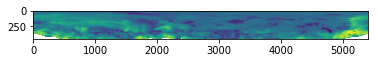

<xarray.DataArray 'z' (lat: 451, lon: 5401)>
array([[52.807697, 52.807697, 52.807697, ..., 52.807697, 52.807697, 52.807697],
       [52.84437 , 52.84437 , 52.84437 , ..., 52.84437 , 52.84437 , 52.84437 ],
       [52.881042, 52.881042, 52.881042, ..., 52.881042, 52.881042, 52.881042],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * lat      (lat) float64 -90.0 -89.93 -89.87 -89.8 ... -60.13 -60.07 -60.0
Attributes:
    long_name:     z
    actual_range:  [ 26.51891518 102.41247559]


9790908

In [8]:
quick_look_netcdf('../../data/an/AN1-HF.grd')

Data with right number of dimensions can be imported directely. Every cell is interpolated, so this might take some time: 

In [9]:
ant.ds['HF'] = (('Y', 'X'), ant.read_grid('../data/an/AN1-HF.grd', xyz = ('lon','lat','z') )) #Default crs is epsg:4326

We got a 3D model in the shape of a number of GMT .grd files. They are essentially netCDF format, but need to be placed in a 3D fram. We hardcode this: 

<xarray.Dataset>
Dimensions:  (x: 451, y: 83)
Coordinates:
  * x        (x) float64 -180.0 -179.2 -178.4 -177.6 ... 177.6 178.4 179.2 180.0
  * y        (y) float64 -90.0 -89.2 -88.39 -87.59 ... -26.41 -25.61 -24.8 -24.0
Data variables:
    z        (y, x) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        hslice_aVs_solution_dsp_ref3d_h20_v30_b100_Moho25_cut50_35.grd
    history:      xyz2grd -R-180/180/-90/-24 -I0.8 a13.pole -Ghslice_aVs_solu...
    GMT_version:  4.5.3 [64-bit]


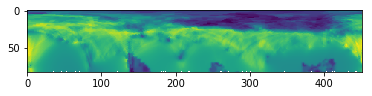

<xarray.DataArray 'z' (y: 83, x: 451)>
array([[3.85937 , 3.85937 , 3.85937 , ..., 3.85937 , 3.85937 , 3.85937 ],
       [3.996017, 3.996017, 3.996017, ..., 3.996017, 3.996017, 3.996017],
       [3.980735, 3.980735, 3.980735, ..., 3.980735, 3.980735, 3.980735],
       ...,
       [4.54324 , 4.586309, 4.664282, ..., 4.459468, 4.496047, 4.54324 ],
       [4.545171, 4.592638, 4.667985, ..., 4.459203, 4.497708, 4.545171],
       [4.528532, 4.59424 , 4.673768, ..., 4.461239, 4.501483, 4.528532]],
      dtype=float32)
Coordinates:
  * x        (x) float64 -180.0 -179.2 -178.4 -177.6 ... 177.6 178.4 179.2 180.0
  * y        (y) float64 -90.0 -89.2 -88.39 -87.59 ... -26.41 -25.61 -24.8 -24.0
Attributes:
    long_name:     z
    actual_range:  [3.51475954 5.0052495 ]


154696

In [10]:
quick_look_netcdf('../data/an/AN1-S/AN1-S_hslice_035.0.grd')

We make a list of files and associate depths from filenames:  

In [13]:
import glob, os
import numpy as np

an_files = sorted(glob.glob('../data/data/an/AN1-S/*.grd'))
#print(an_files)
ant.ds.coords['AN_Z'] = [np.float32(d[-9:-4])*km for d in an_files]
str_depths = [str(d[-9:-4]) for d in an_files]

print(ant.ds.coords['AN_Z'])

an_array = np.empty((ant.nx, ant.ny, len(an_files)))
an_array[:] = np.nan
for i, a in enumerate(ant.ds.coords['AN_Z'].values):
    print(a//km, end=', ')
    fname = '../data/an/AN1-S/AN1-S_hslice_%s.grd'%str_depths[i]
    if os.path.isfile(fname):
        an_array[:,:,i] = ant.read_grid(fname, xyz = ('x','y','z') ) 
    
ant.ds['AN_S'] = (('Y', 'X', 'AN_Z'), an_array)



<xarray.DataArray 'AN_Z' (AN_Z: 0)>
array([], dtype=float64)
Coordinates:
  * AN_Z     (AN_Z) float64 


This might be a good time to save the grid: 

In [14]:
! mkdir ../data/grids/ -p
import pickle
pickle.dump(ant, open('../data/grids/ant.p', "wb" ))

#ant = None

#Or load: 
ant = pickle.load( open('../data/grids/ant.p', "rb" ) )

mkdir: ../local/grids/: File exists
mkdir: -p: File exists


We have already seen some option to look at the data. 

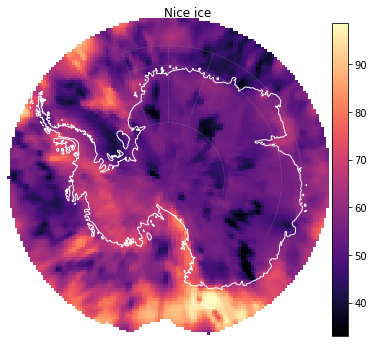

In [15]:
ant.map_grid('HF', cmap='magma', cbar=True, title='Nice ice', 
             par=[-66.563, -70, -80], mer = [-20, 0, 20, 120], 
            line_c = 'white', line_grid_c = 'cyan', line_w=4, 
            circ_map=True, figsize=(5,5))

Some basic 3D viz: 


In [16]:
ant.oblique_view('HF', 
    save_name = '../data/oblique_hf.png',
    vmin= 30, vmax=100, 
    cmap='magma',
    warp_scale=2, 
    distance=1300,
    azimuth=180,
    roll=-90)

! open ../data/oblique_hf.png

The file /Users/tobias_stal/proj/agrid/data/oblique_hf.png does not exist.


We ran `%gui qt` and hince we can call mayavi to display the figure from Jupyter Notebook. Scene opens in new window. (Warning: This is not always so smooth with Jupyter.)

In [ ]:
ant.oblique_view('HF', 
    show=True,
    vmin= 30, vmax=100, 
    cmap='magma',
    warp_scale=2, 
    distance=1300,
    azimuth=180,
    roll=-90)

We assign values from a list to cell bins. 

In [ ]:
xi = [1700*km, 100*km, 1800*km, 1200*km, 1600*km, 2100*km, 1800*km, 0]
yi = [1800*km, 1000*km, 1400*km, 1500*km, 1800*km, 1000*km, 600*km, 0]
zi = [180*km, 10*km, 50*km, 250*km, 60*km, 0*km, 40*km, 0]
data = [1, 2, 3, 4, 5, 2, 3, 7]

xi = xi + xi[::-1]
yi = yi[::-1] + yi
zi = zi + zi[::-1]
data = data + data[::-1]

ant.ds['BIN_3D'] = (('Y', 'X', 'Z'), ant.bins_to_grid(data, yi=yi, xi=xi, zi=zi) )
ant.ds['BIN'] = (('Y', 'X'), ant.bins_to_grid(data, yi=yi, xi=xi) )

ant.map_grid(ant.ds['BIN_3D'].isel(Z=1), cmap='viridis', figsize = (4,4))
ant.map_grid(ant.ds['BIN'], cmap='viridis', figsize = (4,4))

In this example we have more data, but not in the same projection as our grid model. This time we pass the data and samples as numpy arrays. We look at standard diviation for each bin. 

In [ ]:
xi_5000 = np.random.normal(0*km, 1000*km, 10000)
yi_5000 = np.random.normal(200*km, 700*km, 10000)
zi_5000 = np.random.normal(150*km, 75*km, 10000)

#samples can be passed as a numpy array as:

samples = np.array([xi_5000, yi_5000, zi_5000])
print(np.shape(samples))

data_5000 = np.random.normal(10, 3, 10000)
ant.ds['BIN_3D_N5000'] = (('Y', 'X', 'Z'), ant.bins_to_grid(data_5000, 
                                                            samples=samples, 
                                                            function = 'std') )

ant.layer_cake('BIN_3D_N5000', elev=7, azim = 255, d_alpha = 0.6, cbar= False)

# Combine different resolutions

Sometimes, grids of different resolutions need to be joint. agrid includes a method to combine grids of different sizes, if the resolution is a multiple.

Consider this to model frames: 

In [ ]:
world_course = Grid(crs=4326, res = [5, 5])
world_fine = Grid(crs=4326, res = [0.5, 0.5])

In [ ]:
url_raster = '''
    https://www.naturalearthdata.com/http//
    www.naturalearthdata.com/download/50m/
    raster/HYP_50M_SR_W.zip'''

raster_file = '../data/ne/HYP_50M_SR_W/HYP_50M_SR_W.tif'
download(url_raster, raster_file)

In [ ]:
world_course.ds['LAND'] = (('Y', 'X'), 
                world_course.assign_shape('../data/ne/ne_10m_land.shp', 'scalerank', 
                                burn_val=1, map_to_int=False, all_touched=False) )
world_course.map_grid('LAND', figsize=(5,10))

world_fine.ds['RASTER'] = (('Y', 'X'), 
                world_fine.read_raster(raster_file,sub_sampling=3)[...,0] )
world_fine.map_grid('RASTER', figsize=(5,10))

Now we use the low res dataset to select blocks from the hi-res raster: 

In [ ]:
small_raster = world_fine.fold_to_low_res(world_fine.ds['RASTER'], world_course.ds['LAND'])

print(np.shape(small_raster))

We generated a new dimension where blocks from the lare raster are converted ingto vectors. Now we can combin the two, e.g: 

In [ ]:
mostly_land_low_res = small_raster*world_course.ds['LAND'].values[:,:,None,None]

After the operations, we need to fold the hi-res array back to it's original shape:

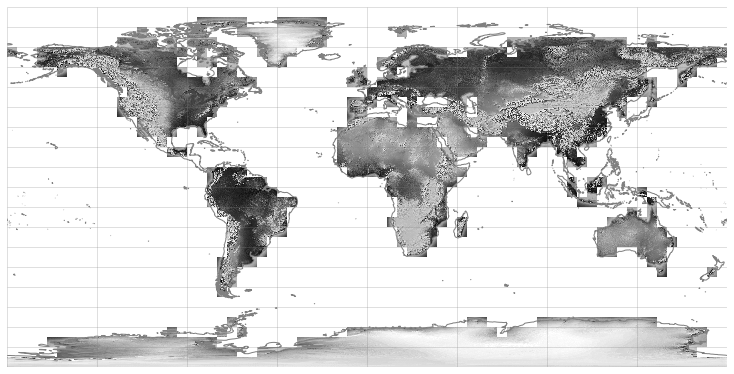

In [46]:
mostly_land_hi_res = world_fine.flatten_to_high_res(mostly_land_low_res, world_fine.ds['RASTER'])
world_fine.map_grid(mostly_land_hi_res)

# Save RGB rasters

When saving RGB rasters, consider the data type and e.v. scaling. Set raster_factor and a different dtype (default is float). 

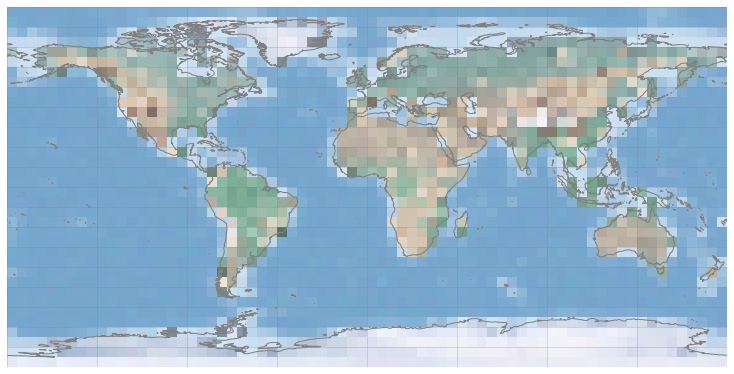

In [47]:
world_course.ds['RASTER_RGB'] = (('Y', 'X', 'RGB'), 
                world_course.read_raster(raster_file,sub_sampling=10))
world_course.map_grid('RASTER_RGB')

In [48]:
world_course.grid_to_raster('RASTER_RGB', raster_factor=255, raster_dtype = 'uint8')